In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from dateutil.parser import parse 
import matplotlib as mpl
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf, pacf
import itertools
import statsmodels.api as sm
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
from datetime import timedelta
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX
from time import time
import math
from datetime import datetime
import itertools
import warnings
plt.style.use('fivethirtyeight')



In [2]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [3]:
df = pd.read_csv("./Concrete.csv",parse_dates=['date'],dayfirst=True,index_col='date').dropna()



In [4]:
df.tail   

<bound method NDFrame.tail of             value
date             
2011-01-31  102.1
2011-02-28  100.6
2011-03-31  100.4
2011-04-30  101.5
2011-05-31  104.8
...           ...
2019-09-30  122.1
2019-10-31  121.8
2019-11-30  121.9
2019-12-31  121.8
2020-01-31  125.9

[109 rows x 1 columns]>

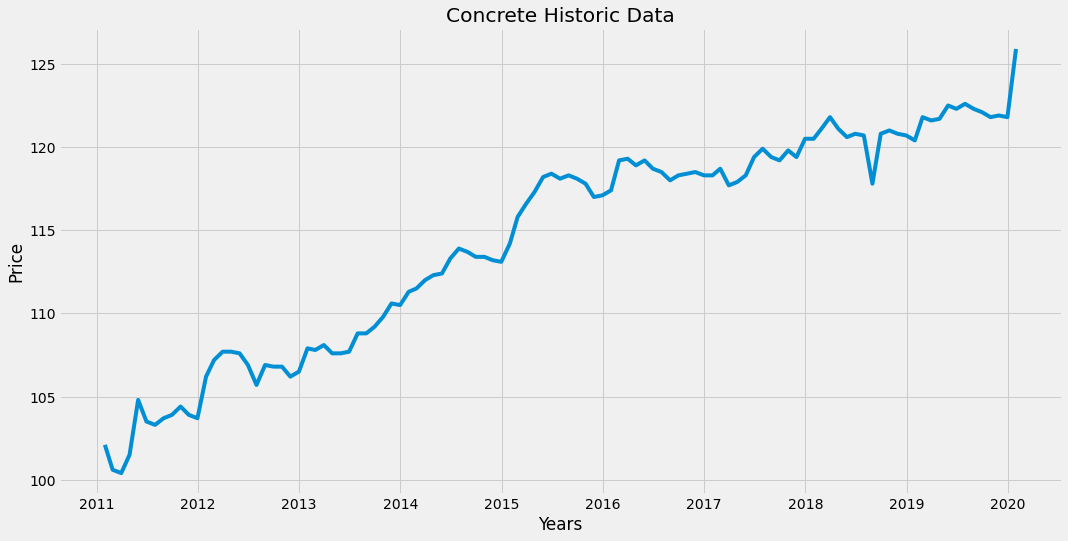

In [5]:
plt.figure(figsize=(16,8))
plt.title('Concrete Historic Data')
plt.xlabel('Years')
plt.ylabel('Price')
plt.plot(df.value)
plt.show()

In [15]:
start_date = datetime(2011,1,1)
end_date = datetime(2020,1,31)
concrete =df[start_date:end_date]

<ipython-input-16-43a26c36c268>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  result = seasonal_decompose(df, model='additive', freq=12)
<ipython-input-16-43a26c36c268>:7: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


<Figure size 432x288 with 0 Axes>

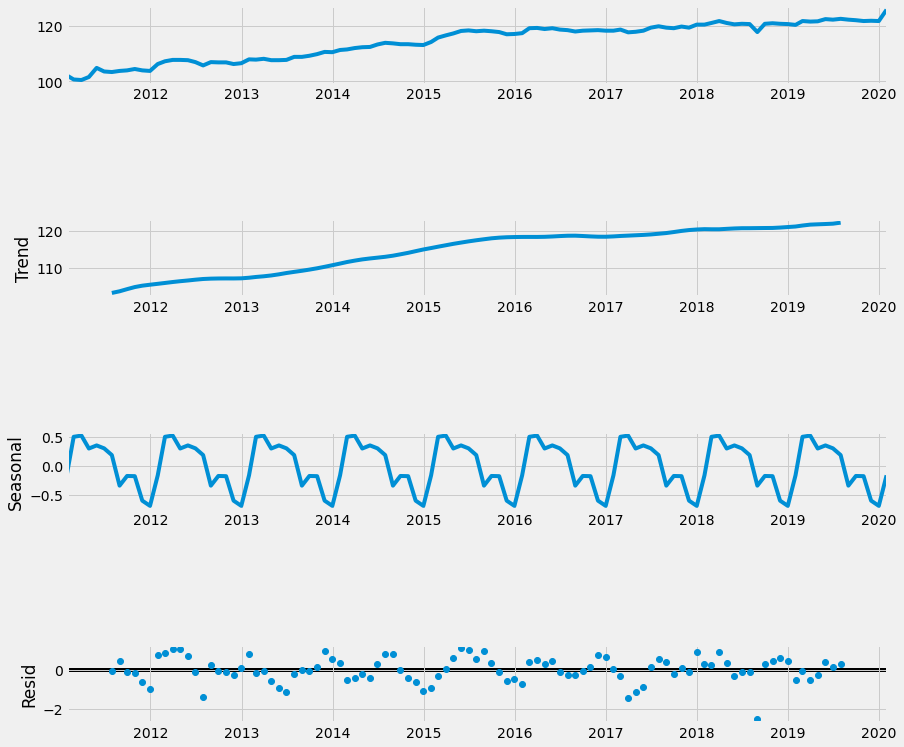

In [16]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df, model='additive', freq=12)

fig = plt.figure()  
fig = result.plot()  
fig.set_size_inches(15, 12)
fig.show()

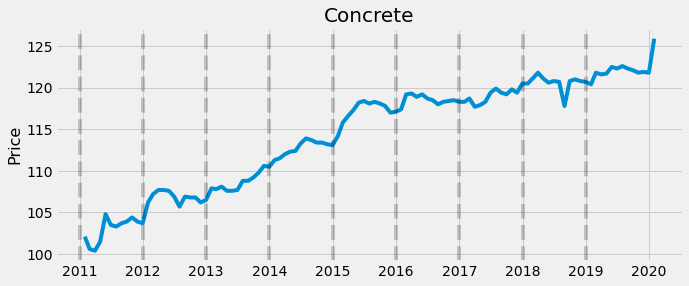

In [17]:
plt.figure(figsize=(10,4))
plt.plot(df)
plt.title('Concrete', fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)

In [18]:
first_diff = df.diff()[1:]

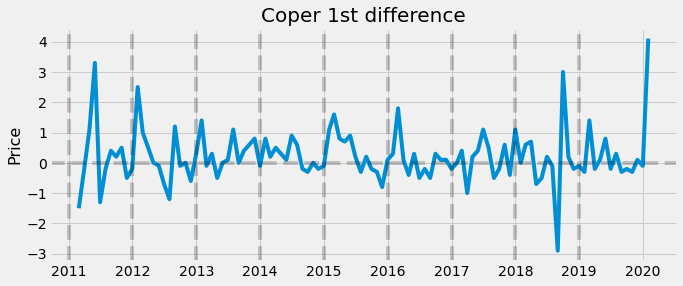

In [19]:
plt.figure(figsize=(10,4))
plt.plot(first_diff)
plt.title('Coper 1st difference', fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(0, color='k', linestyle='--', alpha=0.2)

/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/stattools.py:568: FutureWarning: fft=True will become the default in a future version of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


<BarContainer object of 20 artists>

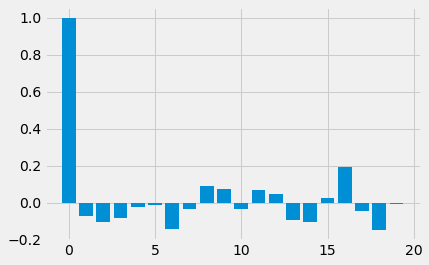

In [20]:
acf_vals = acf(first_diff)
num_lags = 20
plt.bar(range(num_lags), acf_vals[:num_lags])

<BarContainer object of 15 artists>

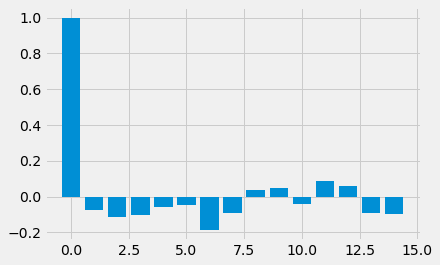

In [21]:
pacf_vals = pacf(first_diff)
num_lags = 15
plt.bar(range(num_lags), pacf_vals[:num_lags])

In [22]:
train_end = datetime(2020,1,1)
test_end = datetime(2021,3,3)

train_data = df[:train_end]
test_data = df[train_end + timedelta(days=1):test_end]

In [23]:
print(test_data)
print(train_data)

            value
date             
2020-01-31  125.9
            value
date             
2011-01-31  102.1
2011-02-28  100.6
2011-03-31  100.4
2011-04-30  101.5
2011-05-31  104.8
...           ...
2019-08-31  122.3
2019-09-30  122.1
2019-10-31  121.8
2019-11-30  121.9
2019-12-31  121.8

[108 rows x 1 columns]


In [24]:
my_order = (1, 1, 0)
my_seasonal_order = (2,2, 3, 12)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)

/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'


In [25]:
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model Fitting Time: 3.4848570823669434


In [26]:
model_fit.mse

192.0289744013838

In [27]:
print(model_fit.summary())


                                         SARIMAX Results                                          
Dep. Variable:                                      value   No. Observations:                  108
Model:             SARIMAX(1, 1, 0)x(2, 2, [1, 2, 3], 12)   Log Likelihood                -127.030
Date:                                    Sun, 21 Mar 2021   AIC                            268.060
Time:                                            15:58:20   BIC                            284.992
Sample:                                        01-31-2011   HQIC                           274.863
                                             - 12-31-2019                                         
Covariance Type:                                      opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0195      0.109     -0.179      0

In [28]:

#get the predictions and residuals
predictions = model_fit.forecast(len(test_data))
predictions = pd.Series(predictions, index=test_data.index)
residuals = test_data['value'] - predictions[0]

In [29]:
print(test_data.head())
print(predictions.head())
print(residuals.head())

            value
date             
2020-01-31  125.9
date
2020-01-31    121.035917
dtype: float64
date
2020-01-31    4.864083
Name: value, dtype: float64


In [30]:
RMSE_training=math.sqrt(model_fit.mse)

In [31]:
RMSE_training
# len(test_data)

13.857451944761843

In [32]:
train_end = datetime(2020,12,31)
train_data = df[:train_end]
# my_order = (4, 2, 3)
# my_seasonal_order = (1,2, 3, 12)
# define model
model = SARIMAX(train_data, order=my_order, seasonal_order=my_seasonal_order)
#fit the model
start = time()
model_fit = model.fit()
end = time()
print('Model Fitting Time:', end - start)

/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  warnings.warn('No frequency information was'
/Users/timzhi/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


Model Fitting Time: 3.903343915939331


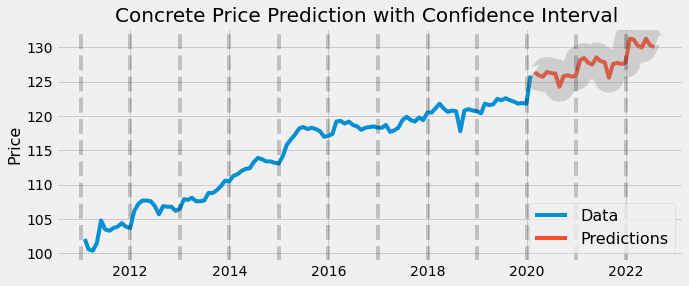

In [33]:
predictions = model_fit.forecast(30)
predictions = pd.Series(predictions)
fig=plt.figure(figsize=(10,4))

plt.plot(df)
plt.plot(predictions, linewidth="4", label ="Predictions")


plt.legend(('Data', 'Predictions'), loc=4, fontsize=16)
plt.plot(predictions, linewidth="30", color="Grey", alpha=0.3)


plt.title('Concrete Price Prediction with Confidence Interval ', fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(start_date.year,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
fig.savefig("Concrete Price Prediciton with Confidence Interval",dpi=120)

In [34]:
predictions

2020-02-29    126.383000
2020-03-31    125.923638
2020-04-30    125.716656
2020-05-31    126.435013
2020-06-30    126.255687
2020-07-31    126.187912
2020-08-31    124.263287
2020-09-30    125.801764
2020-10-31    125.943265
2020-11-30    125.733000
2020-12-31    125.965322
2021-01-31    128.164082
2021-02-28    128.444328
2021-03-31    127.756778
2021-04-30    127.505712
2021-05-31    128.539593
2021-06-30    127.985155
2021-07-31    127.832751
2021-08-31    125.580144
2021-09-30    127.573432
2021-10-31    127.728472
2021-11-30    127.577488
2021-12-31    127.766981
2022-01-31    131.252283
2022-02-28    131.140338
2022-03-31    130.283125
2022-04-30    129.966232
2022-05-31    131.269842
2022-06-30    130.301710
2022-07-31    130.045535
Freq: M, dtype: float64

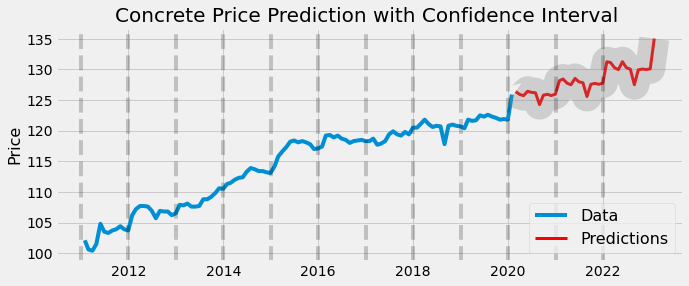

In [35]:
predictions = model_fit.forecast(36)
predictions = pd.Series(predictions)
fig=plt.figure(figsize=(10,4))

plt.plot(df)
plt.plot(predictions, linewidth="3", label ="Predictions", color="red")


plt.legend(('Data', 'Predictions'), fontsize=16)
plt.plot(predictions, linewidth="30", color="Grey", alpha=0.3)


plt.title('Concrete Price Prediction with Confidence Interval ', fontsize=20)
plt.ylabel('Price', fontsize=16)
for year in range(start_date.year,2023):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
fig.savefig("Concrete Price Prediciton with Confidence Interval",dpi=120)

In [36]:
df.tail

<bound method NDFrame.tail of             value
date             
2011-01-31  102.1
2011-02-28  100.6
2011-03-31  100.4
2011-04-30  101.5
2011-05-31  104.8
...           ...
2019-09-30  122.1
2019-10-31  121.8
2019-11-30  121.9
2019-12-31  121.8
2020-01-31  125.9

[109 rows x 1 columns]>